In [1]:
import numpy as np 
import pandas as pd 


import os
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA


import sklearn.metrics as metrics
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import AgglomerativeClustering, KMeans
import importlib

import warnings
warnings.filterwarnings('ignore')


from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from textblob import Word
import string

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version clas

In [2]:
df = pd.read_csv("/Users/nouf/Desktop/COVID19_300k.csv")

In [3]:
df.head()

,paper_id,body_text,methods,results,cord_uid,source_x,title,doi,pmcid,pubmed_id,...,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,language
0,261a1408be03a4ba06ce2fef3c6775fecb60e167,Digital technologies have provided support in ...,We conducted a longitudinal study in four Germ...,The overall results of the structural model te...,pw3dp6us,Medline; PMC,Students’ Acceptance of Technology-Mediated Te...,10.3389/fpsyg.2021.636086,PMC7887425,33613405,...,"Vladova, Gergana; Ullrich, André; Bender, Bene...",Front Psychol,NaN,NaN,NaN,document_parses/pdf_json/261a1408be03a4ba06ce2...,document_parses/pmc_json/PMC7887425.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33613405/;...,231733438.0,en
1,efe13333c69a364cb5d4463ba93815e6fc2d91c6,a1111111111 a1111111111 a1111111111 a111111111...,"This retrospective, observational study was ap...",NaN,u9num2o9,Medline; PMC,Clinical and epidemiological characteristics o...,10.1371/journal.pmed.1003130,PMC7297312,32544155,...,"Zhang, Che; Gu, Jiaowei; Chen, Quanjing; Deng,...",PLoS Med,NaN,NaN,NaN,document_parses/pdf_json/efe13333c69a364cb5d44...,document_parses/pmc_json/PMC7297312.xml.json,https://doi.org/10.1371/journal.pmed.1003130; ...,219726388.0,en
2,4fcb95cc0c4ea6d1fa4137a4a087715ed6b68cea,Improvements in neonatal intensive care have r...,We reviewed the records of infants born at les...,Three hundred and seventy infants were born at...,yyrycjjm,PMC,End-tidal carbon dioxide levels during resusci...,10.1007/s00431-019-03543-0,PMC7080666,31848749,...,"Tamura, Kentaro; Williams, Emma E; Dassios, Th...",Eur J Pediatr,NaN,NaN,NaN,document_parses/pdf_json/4fcb95cc0c4ea6d1fa413...,document_parses/pmc_json/PMC7080666.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,en
3,94310f437664763acbb472df37158b9694a3bf3a,The coronavirus disease 2019 (COVID- 19) is an...,"Stony Brook University Hospital, located about...",NaN,m2snogl2,Medline; PMC,Prediction model and risk scores of ICU admiss...,10.1371/journal.pone.0236618,PMC7392248,32730358,...,"Zhao, Zirun; Chen, Anne; Hou, Wei; Graham, Jam...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/94310f437664763acbb47...,document_parses/pmc_json/PMC7392248.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32730358/;...,220887296.0,en
4,7893b2eacabd217e5740331425371336afb9a575,"Currently, one of the main tasks of 3D modelli...",The input data for the algorithm are an image ...,The final step is to export the result to vari...,hec8z3l9,PMC,Algorithm for Creating Massive Amounts of Uniq...,10.1007/978-3-030-58817-5_8,PMC7975063,NaN,...,"Iakushkin, Oleg; Budlov, Egor; Bainova, Ekater...",Computational Science and Its Applications - I...,NaN,NaN,NaN,document_parses/pdf_json/7893b2eacabd217e57403...,document_parses/pmc_json/PMC7975063.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,en


In [11]:
df1=df.drop(['cord_uid','paper_id','source_x','title','doi',
'pmcid','pubmed_id','license','publish_time','journal','mag_id',
'who_covidence_id','arxiv_id','pdf_json_files','pmc_json_files','url','s2_id'],axis=1)

In [12]:
df1

,body_text,methods,results,abstract,authors,language
0,Digital technologies have provided support in ...,We conducted a longitudinal study in four Germ...,The overall results of the structural model te...,In response to the impending spread of COVID-1...,"Vladova, Gergana; Ullrich, André; Bender, Bene...",en
1,a1111111111 a1111111111 a1111111111 a111111111...,"This retrospective, observational study was ap...",NaN,"BACKGROUND: As of April 18, 2020, over 2,000,0...","Zhang, Che; Gu, Jiaowei; Chen, Quanjing; Deng,...",en
2,Improvements in neonatal intensive care have r...,We reviewed the records of infants born at les...,Three hundred and seventy infants were born at...,Abnormal levels of end-tidal carbon dioxide (E...,"Tamura, Kentaro; Williams, Emma E; Dassios, Th...",en
3,The coronavirus disease 2019 (COVID- 19) is an...,"Stony Brook University Hospital, located about...",NaN,This study aimed to develop risk scores based ...,"Zhao, Zirun; Chen, Anne; Hou, Wei; Graham, Jam...",en
4,"Currently, one of the main tasks of 3D modelli...",The input data for the algorithm are an image ...,The final step is to export the result to vari...,The article describes the algorithm for creati...,"Iakushkin, Oleg; Budlov, Egor; Bainova, Ekater...",en
...,...,...,...,...,...,...
306072,"In this era of globalisation, 164 million peop...",NaN,NaN,"INTRODUCTION: Worldwide, COVID-19 clusters hav...","Saw, Young Ern; Tan, Edina YQ; Buvanaswari, P;...",en
306073,In their review discussing the effects of Seve...,NaN,NaN,Short title: SARS-CoV-2-Associated Inflammator...,"Picichè, Marco",en
306074,Assiri and colleagues 1 provide a clinical syn...,NaN,NaN,NaN,"Gautret, Philippe; Benkouiten, Samir; Salahedd...",en
306075,International Journal of Nursing Studies j o u...,NaN,NaN,NaN,"Chong, Yuen Yu; Cheng, Ho Yu; Chan, Helen Yue ...",en


In [13]:
df1=df1.drop(["methods","results","abstract","language"],axis=1)

In [14]:
df1

,body_text,authors
0,Digital technologies have provided support in ...,"Vladova, Gergana; Ullrich, André; Bender, Bene..."
1,a1111111111 a1111111111 a1111111111 a111111111...,"Zhang, Che; Gu, Jiaowei; Chen, Quanjing; Deng,..."
2,Improvements in neonatal intensive care have r...,"Tamura, Kentaro; Williams, Emma E; Dassios, Th..."
3,The coronavirus disease 2019 (COVID- 19) is an...,"Zhao, Zirun; Chen, Anne; Hou, Wei; Graham, Jam..."
4,"Currently, one of the main tasks of 3D modelli...","Iakushkin, Oleg; Budlov, Egor; Bainova, Ekater..."
...,...,...
306072,"In this era of globalisation, 164 million peop...","Saw, Young Ern; Tan, Edina YQ; Buvanaswari, P;..."
306073,In their review discussing the effects of Seve...,"Picichè, Marco"
306074,Assiri and colleagues 1 provide a clinical syn...,"Gautret, Philippe; Benkouiten, Samir; Salahedd..."
306075,International Journal of Nursing Studies j o u...,"Chong, Yuen Yu; Cheng, Ho Yu; Chan, Helen Yue ..."


In [15]:
df1.isna().sum()

body_text        0
authors      39828
dtype: int64

In [16]:
#df1['first_n_a'] = df1['authors'].apply(lambda x: x.split(';'))

In [17]:
df1['authors'].value_counts(sort=True).head(30)

Mungmunpuntipantip, Rujittika; Wiwanitkit, Viroj                                                                                                                                                                                                                                                                                                          44
Kow, Chia Siang; Hasan, Syed Shahzad                                                                                                                                                                                                                                                                                                                      39
Atwoli, Lukoye; H Baqui, Abdullah; Benfield, Thomas; Bosurgi, Raffaella; Godlee, Fiona; Hancocks, Stephen; Horton, Richard; Laybourn-Langton, Laurie; Monteiro, Carlos Augusto; Norman, Ian; Patrick, Kirsten; Praities, Nigel; Rikkert, Marcel GM Olde; Rubin, Eric J; Sahni, Peush; Smith, Richard; Talley, 

In [18]:
name=["Mungmunpuntipantip, Rujittika; Wiwanitkit, Viroj",                                                                                                                                                                                                                                                                                                          
"Kow, Chia Siang; Hasan, Syed Shahzad",                                                                                                                                                                                                                                                                                                                      
"Atwoli, Lukoye; H Baqui, Abdullah; Benfield, Thomas; Bosurgi, Raffaella; Godlee, Fiona; Hancocks, Stephen; Horton, Richard; Laybourn-Langton, Laurie; Monteiro, Carlos Augusto; Norman, Ian; Patrick, Kirsten; Praities, Nigel; Rikkert, Marcel GM Olde; Rubin, Eric J; Sahni, Peush; Smith, Richard; Talley, Nicholas J; Turale, Sue; Vázquez, Damián",   
"Joob, Beuy; Wiwanitkit, Viroj",                                                                                                                                                                                                                                                                                                                           
"Wiwanitkit, Viroj",                                                                                                                                                                                                                                                                                                                                        
"Westgarth, David",                                                                                                                                                                                                                                                                                                                                         
"Parums, Dinah V.",                                                                                                                                                                                                                                                                                                                                         
"Finsterer, Josef",                                                                                                                                                                                                                                                                                                                                          
"Andersen, Bjørg Marit",                                                                                                                                                                                                                                                                                                                                    
"Helmold, Marc"]                                                                                                                                                                                                                                                                                                                                             

In [19]:
df_author = df1[df1["authors"].isin(name)].copy()
df_author.head()

,body_text,authors
321,wileyonlinelibrary.com/journal/ped4\nTo the ed...,"Joob, Beuy; Wiwanitkit, Viroj"
1356,There is an increasing number of publications ...,"Finsterer, Josef"
4834,"vaccination, it might be possible. An importan...","Mungmunpuntipantip, Rujittika; Wiwanitkit, Viroj"
4835,Email ID: chiasiang_93@hotmail.com\nWe appreci...,"Kow, Chia Siang; Hasan, Syed Shahzad"
5589,"To the Editor, We found the article titled ""Fu...","Joob, Beuy; Wiwanitkit, Viroj"


In [20]:
df_author

,body_text,authors
321,wileyonlinelibrary.com/journal/ped4\nTo the ed...,"Joob, Beuy; Wiwanitkit, Viroj"
1356,There is an increasing number of publications ...,"Finsterer, Josef"
4834,"vaccination, it might be possible. An importan...","Mungmunpuntipantip, Rujittika; Wiwanitkit, Viroj"
4835,Email ID: chiasiang_93@hotmail.com\nWe appreci...,"Kow, Chia Siang; Hasan, Syed Shahzad"
5589,"To the Editor, We found the article titled ""Fu...","Joob, Beuy; Wiwanitkit, Viroj"
...,...,...
301538,"Dear Editor, I would like to share ideas on th...","Wiwanitkit, Viroj"
303498,processing will succeed. The dimensions of the...,"Helmold, Marc"
304182,The United Nations General Assembly in Septemb...,"Atwoli, Lukoye; H Baqui, Abdullah; Benfield, T..."
304691,This article is protected by copyright. All ri...,"Kow, Chia Siang; Hasan, Syed Shahzad"


In [21]:
df_author.to_csv('author.csv',index=False)

In [22]:
df = pd.read_csv("/Users/nouf/Desktop/البروجيكت الرابع/author.csv")

In [23]:
df

,body_text,authors
0,wileyonlinelibrary.com/journal/ped4\nTo the ed...,"Joob, Beuy; Wiwanitkit, Viroj"
1,There is an increasing number of publications ...,"Finsterer, Josef"
2,"vaccination, it might be possible. An importan...","Mungmunpuntipantip, Rujittika; Wiwanitkit, Viroj"
3,Email ID: chiasiang_93@hotmail.com\nWe appreci...,"Kow, Chia Siang; Hasan, Syed Shahzad"
4,"To the Editor, We found the article titled ""Fu...","Joob, Beuy; Wiwanitkit, Viroj"
...,...,...
258,"Dear Editor, I would like to share ideas on th...","Wiwanitkit, Viroj"
259,processing will succeed. The dimensions of the...,"Helmold, Marc"
260,The United Nations General Assembly in Septemb...,"Atwoli, Lukoye; H Baqui, Abdullah; Benfield, T..."
261,This article is protected by copyright. All ri...,"Kow, Chia Siang; Hasan, Syed Shahzad"


In [24]:
df.authors.nunique()

10

In [25]:
dc = { "Mungmunpuntipantip, Rujittika; Wiwanitkit, Viroj"      :1,
"Kow, Chia Siang; Hasan, Syed Shahzad"        :2,
"Atwoli, Lukoye; H Baqui, Abdullah; Benfield, Thomas; Bosurgi, Raffaella; Godlee, Fiona; Hancocks, Stephen; Horton, Richard; Laybourn-Langton, Laurie; Monteiro, Carlos Augusto; Norman, Ian; Patrick, Kirsten; Praities, Nigel; Rikkert, Marcel GM Olde; Rubin, Eric J; Sahni, Peush; Smith, Richard; Talley, Nicholas J; Turale, Sue; Vázquez, Damián"      :3,
"Joob, Beuy; Wiwanitkit, Viroj"      :4,
"Wiwanitkit, Viroj"    :5,
"Westgarth, David"        :6,
"Parums, Dinah V."      :7,
"Finsterer, Josef"      :8,
"Andersen, Bjørg Marit"      :9,
"Helmold, Marc"      :10,
     }

In [26]:
df.replace({"authors": dc },inplace=True)

In [27]:
df

,body_text,authors
0,wileyonlinelibrary.com/journal/ped4\nTo the ed...,4
1,There is an increasing number of publications ...,8
2,"vaccination, it might be possible. An importan...",1
3,Email ID: chiasiang_93@hotmail.com\nWe appreci...,2
4,"To the Editor, We found the article titled ""Fu...",4
...,...,...
258,"Dear Editor, I would like to share ideas on th...",5
259,processing will succeed. The dimensions of the...,10
260,The United Nations General Assembly in Septemb...,3
261,This article is protected by copyright. All ri...,2


In [28]:
df['body_text'] = df['body_text'].str.lower()

In [29]:
df['body_text'] = df['body_text'].apply(lambda x : re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",x))

In [30]:
import unidecode

In [31]:
df['body_text'] = df['body_text'].apply(lambda x : unidecode.unidecode(x))

In [32]:
df['body_text']= df['body_text'].apply(lambda x : re.sub(r'\.+', ". ", x))

In [33]:
df['body_text'] = df['body_text'].str.replace("[^a-zA-Z#]", " ")

In [34]:
df['body_text'] = df['body_text'].apply(lambda x: remove_stopwords(x))

In [35]:
df['body_text'] = df['body_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [36]:
from textblob import Word

In [37]:
df['body_text'] = df['body_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [38]:
from nltk.corpus import stopwords

In [39]:
stop = stopwords.words('english')
df['body_text'] = df['body_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [40]:
# import pandas as pd
# corpus = df['body_text']

# # TF-IDF Vectorizer

# from sklearn.feature_extraction.text import TfidfVectorizer
# cv_tfidf = TfidfVectorizer(max_features=2**12)
# X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
# df1=pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

In [41]:
df

,body_text,authors
0,wileyonlinelibrary com journal ped editor publ...,4
1,increasing number publication reporting putati...,8
2,vaccination possible important possible pathog...,1
3,email chiasiang hotmail com appreciate literat...,2
4,editor article titled fulminant myocarditis co...,4
...,...,...
258,dear editor like share idea publication covid ...,5
259,processing succeed dimension modernization pro...,10
260,united nation general assembly september bring...,3
261,article protected copyright right reserved dis...,2


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorizer = TfidfVectorizer(min_df = 10 ,max_df = 100000)
X = vectorizer.fit_transform(df['body_text']).toarray()
df1=pd.DataFrame(X, columns= vectorizer.get_feature_names())

In [44]:
vectorizer

TfidfVectorizer(max_df=100000, min_df=10)

In [45]:
X.shape

(263, 1907)

In [46]:
df1

,ability,able,abnormal,abroad,absence,absolutely,academic,accelerate,acceptable,access,...,wrong,wrote,www,year,yes,yield,young,zero,zone,zoonotic
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.159248,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.019421,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.202617,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.134804,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
259,0.000000,0.000000,0.000000,0.012689,0.0,0.0,0.024363,0.000000,0.000000,0.022165,...,0.012181,0.0,0.000000,0.021426,0.0,0.000000,0.000000,0.000000,0.0,0.000000
260,0.017713,0.017605,0.000000,0.000000,0.0,0.0,0.000000,0.022165,0.021784,0.018515,...,0.000000,0.0,0.026522,0.053693,0.0,0.022363,0.000000,0.063741,0.0,0.021972
261,0.037417,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X)
X_reduced.shape

(263, 178)

In [48]:
df2=pd.DataFrame(X_reduced)

In [49]:
df2

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,-0.124846,0.029092,0.102552,-0.111026,-0.149733,-0.110817,0.090249,0.066794,-0.051605,0.052364,...,-0.066794,0.003979,-0.016957,0.005212,-0.011048,0.023040,0.026814,-0.002603,-0.002606,-0.018547
1,-0.178232,-0.248202,-0.210938,-0.220512,0.293005,0.039709,0.163135,-0.042786,0.045678,-0.000425,...,0.018017,-0.087073,0.109651,-0.002229,0.051171,0.009349,-0.037335,0.001737,-0.067082,0.035146
2,-0.168249,-0.210267,-0.275088,-0.310090,0.025785,-0.014929,-0.296910,-0.002087,-0.050291,-0.074532,...,0.036224,0.006629,-0.019305,0.025091,-0.089025,0.031228,0.035921,-0.077446,0.024146,0.074064
3,-0.203624,-0.168898,-0.072004,0.052363,0.103347,-0.046796,-0.148616,0.003410,0.017476,-0.070323,...,0.027071,-0.060383,0.011040,-0.027962,0.058173,-0.016631,0.054461,0.017105,-0.024362,0.000685
4,-0.150032,-0.088595,-0.025558,0.059192,-0.160372,-0.128570,-0.006572,-0.089622,-0.038259,-0.218141,...,-0.013429,-0.024919,0.005718,0.055103,0.009581,0.002267,-0.002494,-0.036843,-0.001339,0.009623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,-0.169696,-0.193951,-0.069585,-0.156001,-0.163015,-0.164340,-0.188905,-0.083648,0.002795,0.023475,...,0.057483,0.044291,-0.041652,-0.009372,0.000865,-0.008585,0.098793,-0.038316,0.021222,-0.031242
259,-0.056853,0.242673,-0.174039,-0.026880,-0.122722,0.209076,0.034853,-0.060777,0.052269,0.018908,...,0.009809,-0.034015,0.014066,-0.012938,0.002926,-0.037614,-0.030510,-0.050828,0.002489,0.032074
260,0.844820,-0.057701,0.025073,0.007702,0.010869,0.001252,-0.000327,-0.016429,-0.009642,0.002000,...,0.012374,0.013750,-0.010862,-0.017408,0.038802,-0.010971,-0.025112,-0.004831,0.020568,0.041371
261,-0.147336,-0.143222,0.020823,0.176790,0.077772,0.104278,0.087769,0.013607,-0.013301,-0.052882,...,-0.065673,0.030967,0.003355,0.050289,0.002606,0.072505,0.078741,-0.007339,0.048079,0.028964


In [50]:
df 

,body_text,authors
0,wileyonlinelibrary com journal ped editor publ...,4
1,increasing number publication reporting putati...,8
2,vaccination possible important possible pathog...,1
3,email chiasiang hotmail com appreciate literat...,2
4,editor article titled fulminant myocarditis co...,4
...,...,...
258,dear editor like share idea publication covid ...,5
259,processing succeed dimension modernization pro...,10
260,united nation general assembly september bring...,3
261,article protected copyright right reserved dis...,2


In [51]:
dfs = pd.concat([df,df2],axis=1)


In [84]:
dfs

,body_text,authors,0,1,2,3,4,5,6,7,...,168,169,170,171,172,173,174,175,176,177
0,wileyonlinelibrary com journal ped editor publ...,4,-0.124846,0.029092,0.102552,-0.111026,-0.149733,-0.110817,0.090249,0.066794,...,-0.066794,0.003979,-0.016957,0.005212,-0.011048,0.023040,0.026814,-0.002603,-0.002606,-0.018547
1,increasing number publication reporting putati...,8,-0.178232,-0.248202,-0.210938,-0.220512,0.293005,0.039709,0.163135,-0.042786,...,0.018017,-0.087073,0.109651,-0.002229,0.051171,0.009349,-0.037335,0.001737,-0.067082,0.035146
2,vaccination possible important possible pathog...,1,-0.168249,-0.210267,-0.275088,-0.310090,0.025785,-0.014929,-0.296910,-0.002087,...,0.036224,0.006629,-0.019305,0.025091,-0.089025,0.031228,0.035921,-0.077446,0.024146,0.074064
3,email chiasiang hotmail com appreciate literat...,2,-0.203624,-0.168898,-0.072004,0.052363,0.103347,-0.046796,-0.148616,0.003410,...,0.027071,-0.060383,0.011040,-0.027962,0.058173,-0.016631,0.054461,0.017105,-0.024362,0.000685
4,editor article titled fulminant myocarditis co...,4,-0.150032,-0.088595,-0.025558,0.059192,-0.160372,-0.128570,-0.006572,-0.089622,...,-0.013429,-0.024919,0.005718,0.055103,0.009581,0.002267,-0.002494,-0.036843,-0.001339,0.009623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,dear editor like share idea publication covid ...,5,-0.169696,-0.193951,-0.069585,-0.156001,-0.163015,-0.164340,-0.188905,-0.083648,...,0.057483,0.044291,-0.041652,-0.009372,0.000865,-0.008585,0.098793,-0.038316,0.021222,-0.031242
259,processing succeed dimension modernization pro...,10,-0.056853,0.242673,-0.174039,-0.026880,-0.122722,0.209076,0.034853,-0.060777,...,0.009809,-0.034015,0.014066,-0.012938,0.002926,-0.037614,-0.030510,-0.050828,0.002489,0.032074
260,united nation general assembly september bring...,3,0.844820,-0.057701,0.025073,0.007702,0.010869,0.001252,-0.000327,-0.016429,...,0.012374,0.013750,-0.010862,-0.017408,0.038802,-0.010971,-0.025112,-0.004831,0.020568,0.041371
261,article protected copyright right reserved dis...,2,-0.147336,-0.143222,0.020823,0.176790,0.077772,0.104278,0.087769,0.013607,...,-0.065673,0.030967,0.003355,0.050289,0.002606,0.072505,0.078741,-0.007339,0.048079,0.028964


In [52]:
dfs

,body_text,authors,0,1,2,3,4,5,6,7,...,168,169,170,171,172,173,174,175,176,177
0,wileyonlinelibrary com journal ped editor publ...,4,-0.124846,0.029092,0.102552,-0.111026,-0.149733,-0.110817,0.090249,0.066794,...,-0.066794,0.003979,-0.016957,0.005212,-0.011048,0.023040,0.026814,-0.002603,-0.002606,-0.018547
1,increasing number publication reporting putati...,8,-0.178232,-0.248202,-0.210938,-0.220512,0.293005,0.039709,0.163135,-0.042786,...,0.018017,-0.087073,0.109651,-0.002229,0.051171,0.009349,-0.037335,0.001737,-0.067082,0.035146
2,vaccination possible important possible pathog...,1,-0.168249,-0.210267,-0.275088,-0.310090,0.025785,-0.014929,-0.296910,-0.002087,...,0.036224,0.006629,-0.019305,0.025091,-0.089025,0.031228,0.035921,-0.077446,0.024146,0.074064
3,email chiasiang hotmail com appreciate literat...,2,-0.203624,-0.168898,-0.072004,0.052363,0.103347,-0.046796,-0.148616,0.003410,...,0.027071,-0.060383,0.011040,-0.027962,0.058173,-0.016631,0.054461,0.017105,-0.024362,0.000685
4,editor article titled fulminant myocarditis co...,4,-0.150032,-0.088595,-0.025558,0.059192,-0.160372,-0.128570,-0.006572,-0.089622,...,-0.013429,-0.024919,0.005718,0.055103,0.009581,0.002267,-0.002494,-0.036843,-0.001339,0.009623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,dear editor like share idea publication covid ...,5,-0.169696,-0.193951,-0.069585,-0.156001,-0.163015,-0.164340,-0.188905,-0.083648,...,0.057483,0.044291,-0.041652,-0.009372,0.000865,-0.008585,0.098793,-0.038316,0.021222,-0.031242
259,processing succeed dimension modernization pro...,10,-0.056853,0.242673,-0.174039,-0.026880,-0.122722,0.209076,0.034853,-0.060777,...,0.009809,-0.034015,0.014066,-0.012938,0.002926,-0.037614,-0.030510,-0.050828,0.002489,0.032074
260,united nation general assembly september bring...,3,0.844820,-0.057701,0.025073,0.007702,0.010869,0.001252,-0.000327,-0.016429,...,0.012374,0.013750,-0.010862,-0.017408,0.038802,-0.010971,-0.025112,-0.004831,0.020568,0.041371
261,article protected copyright right reserved dis...,2,-0.147336,-0.143222,0.020823,0.176790,0.077772,0.104278,0.087769,0.013607,...,-0.065673,0.030967,0.003355,0.050289,0.002606,0.072505,0.078741,-0.007339,0.048079,0.028964


In [53]:
from sklearn.model_selection import train_test_split

In [93]:
df_train, df_test = train_test_split(dfs, test_size=0.2)

In [94]:
X_train = df_train.drop(["authors","body_text"], axis = 1)
y_train = df_train["authors"]

In [95]:
y_train.value_counts()

1     36
2     29
3     28
5     19
4     18
7     18
6     17
8     16
9     15
10    14
Name: authors, dtype: int64

In [96]:
y_test.value_counts()

2     10
1      9
3      8
8      6
4      5
10     4
9      4
6      3
5      3
7      1
Name: authors, dtype: int64

In [97]:
X_test =  df_test.drop(["authors","body_text"], axis = 1)
y_test = df_test["authors"]

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
from sklearn.model_selection import cross_validate

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=0.95,random_state=0)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.83333333, 0.73809524, 0.80952381, 0.83333333, 0.76190476])

In [117]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7952380952380953

In [118]:
log_cfl = LogisticRegression(C=0.95,random_state=0)

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92        36
           2       0.91      1.00      0.95        29
           3       1.00      1.00      1.00        28
           4       1.00      0.89      0.94        18
           5       0.93      0.74      0.82        19
           6       1.00      1.00      1.00        17
           7       1.00      0.94      0.97        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        14

    accuracy                           0.96       210
   macro avg       0.97      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

[[35  1  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 1  0  0 16  1  0  0  0  0  0]
 [ 4  1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  0  0

In [107]:
log_cfl = LogisticRegression(C=0.95,random_state=0)

log_cfl.fit(X_train, y_train)

y_predict = log_cfl.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.46      0.75      0.57         8
           2       0.82      0.90      0.86        10
           3       1.00      1.00      1.00         5
           4       0.80      0.50      0.62         8
           5       0.75      0.50      0.60         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4

    accuracy                           0.79        53
   macro avg       0.88      0.83      0.84        53
weighted avg       0.83      0.79      0.79        53

[[6 1 0 1 0 0 0 0 0 0]
 [1 9 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [3 0 0 4 1 0 0 0 0 0]
 [3 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 1 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]


In [120]:
from sklearn.ensemble import RandomForestClassifier


In [121]:
rf_cfl = RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           1       0.35      0.94      0.51        36
           2       0.76      0.90      0.83        29
           3       1.00      1.00      1.00        28
           4       1.00      0.06      0.11        18
           5       0.00      0.00      0.00        19
           6       1.00      0.82      0.90        17
           7       0.00      0.00      0.00        18
           8       1.00      0.50      0.67        16
           9       1.00      1.00      1.00        15
          10       1.00      0.93      0.96        14

    accuracy                           0.66       210
   macro avg       0.71      0.61      0.60       210
weighted avg       0.68      0.66      0.60       210

[[34  2  0  0  0  0  0  0  0  0]
 [ 3 26  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [17  0  0  1  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 14  0  0  0  0]
 [12  6  0  0  0  0  0  0  0  0]
 [ 8  0  0

In [122]:
rf_cfl = RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

rf_cfl.fit(X_train, y_train)

y_predict = rf_cfl.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.26      0.88      0.40         8
           2       0.70      0.70      0.70        10
           3       1.00      1.00      1.00         5
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4

    accuracy                           0.57        53
   macro avg       0.50      0.56      0.51        53
weighted avg       0.47      0.57      0.49        53

[[7 1 0 0 0 0 0 0 0 0]
 [3 7 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]


In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           1       0.74      0.69      0.71        36
           2       0.75      0.93      0.83        29
           3       0.93      1.00      0.97        28
           4       0.67      0.44      0.53        18
           5       0.83      0.53      0.65        19
           6       0.94      1.00      0.97        17
           7       0.70      0.78      0.74        18
           8       0.94      1.00      0.97        16
           9       0.83      1.00      0.91        15
          10       1.00      0.93      0.96        14

    accuracy                           0.82       210
   macro avg       0.83      0.83      0.82       210
weighted avg       0.82      0.82      0.81       210

[[25  4  1  1  0  1  3  0  1  0]
 [ 0 27  0  0  0  0  2  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 4  3  0  8  1  0  1  1  0  0]
 [ 4  1  0  3 10  0  0  0  1  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 1  1  1  0  1  0 14  0  0  0]
 [ 0  0  0

In [127]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.33      0.25      0.29         8
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         5
           4       0.57      0.50      0.53         8
           5       0.60      0.50      0.55         6
           6       0.75      1.00      0.86         3
           7       0.67      1.00      0.80         2
           8       1.00      0.67      0.80         3
           9       0.80      1.00      0.89         4
          10       1.00      1.00      1.00         4

    accuracy                           0.74        53
   macro avg       0.76      0.79      0.76        53
weighted avg       0.72      0.74      0.72        53

[[ 2  1  0  3  1  0  1  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0]
 [ 2  0  0  4  1  0  0  0  1  0]
 [ 2  0  0  0  3  1  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  1  0

In [134]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


In [135]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
DT_clf = DecisionTreeClassifier(max_depth=2)
rf_cfl =  RandomForestClassifier(n_estimators = 200,random_state = 42 , max_depth=2)

In [138]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[05:57:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        14

    accuracy                           1.0

In [139]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators = 100 ,max_depth=1)
xgb_cfl.fit(X_train, y_train)

y_predict = xgb_cfl.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

[05:58:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.33      0.62      0.43         8
           2       0.70      0.70      0.70        10
           3       1.00      1.00      1.00         5
           4       0.67      0.50      0.57         8
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         2
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4

    accuracy                           0.7

In [136]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('dt', DT_clf), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

[05:56:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        14

    accuracy                           1.0

In [137]:
vot = VotingClassifier (estimators = [('xgb', xgb_cfl), ('dt', DT_clf), ('rf', rf_cfl)], voting='soft')
vot.fit(X_train, y_train)

y_predict = vot.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

[05:57:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.29      0.62      0.40         8
           2       0.67      0.60      0.63        10
           3       1.00      1.00      1.00         5
           4       0.67      0.50      0.57         8
           5       1.00      0.33      0.50         6
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         2
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4

    accuracy                           0.6

In [150]:
from sklearn import svm

In [147]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear')
cross_val_score(clf, X_train, y_train, cv=5)

array([0.92857143, 0.78571429, 0.85714286, 0.85714286, 0.80952381])

In [153]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8476190476190476

In [148]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.97      0.99        36
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       0.94      0.94      0.94        18
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        14

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210

[[35  0  0  1  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 17  1  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0

In [151]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

y_predict = svm.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.46      0.75      0.57         8
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00         5
           4       0.83      0.62      0.71         8
           5       0.75      0.50      0.60         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4

    accuracy                           0.81        53
   macro avg       0.89      0.87      0.87        53
weighted avg       0.84      0.81      0.82        53

[[6 1 0 1 0 0 0 0 0 0]
 [2 8 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [2 0 0 5 1 0 0 0 0 0]
 [3 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]


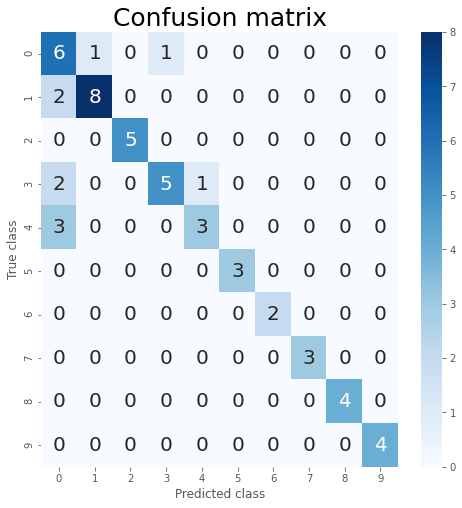

In [158]:
plt.figure(figsize =(8,8)) 
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, fmt ="d",  cmap="Blues",annot_kws={"size": 20}); 
plt.title("Confusion matrix",fontsize = 25) 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()